### POSTTEST 8 - Deep Learning
### Nama    :  Wahyu Harry Saputra Sembiring
### NIM     :  2009106049
### Kelas   :  Informatika A 2020 (A2)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=64, input_shape=[10,10,1]),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(32, kernel_initializer=tf.keras.initializers.he_normal),
tf.keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10, 10, 64)        128       
                                                                 
 dense_4 (Dense)             (None, 10, 10, 32)        2080      
                                                                 
 dense_5 (Dense)             (None, 10, 10, 32)        1056      
                                                                 
 dense_6 (Dense)             (None, 10, 10, 32)        1056      
                                                                 
 dense_7 (Dense)             (None, 10, 10, 10)        330       
                                                                 
Total params: 4,650
Trainable params: 4,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
import numpy as np

#membuat variable x sebagai atribute dan y sebagai label
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
y = np.array([2.0, 4.0, 6.0, 8.0, 10.0, 12.0], dtype=float)

#membuat sequential dimana hanya 1 dense layer yang dibutuhkan
model = tf.keras.Sequential([
tf.keras.layers.Dense(units=1, input_shape=[1])
])

#model di kompilasi dengan optimizer sgd dan loss MSE
model.compile(optimizer='sgd', loss='mse')

#model di training dengan epoch yang dapat kita atur
model.fit(x, y, epochs=50)

#mencoba prediksi y dengan model yang telah dilatih
y_pred = model.predict([6.0, 7.0, 8.0])
print(y_pred)

Epoch 1/50
1/1 [==============================] - 0s 263ms/step - loss: 97.0468
Epoch 2/50
1/1 [==============================] - 0s 11ms/step - loss: 44.9482
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 20.8351
Epoch 4/50
1/1 [==============================] - 0s 11ms/step - loss: 9.6747
Epoch 5/50
1/1 [==============================] - 0s 9ms/step - loss: 4.5090
Epoch 6/50
1/1 [==============================] - 0s 12ms/step - loss: 2.1180
Epoch 7/50
1/1 [==============================] - 0s 8ms/step - loss: 1.0111
Epoch 8/50
1/1 [==============================] - 0s 16ms/step - loss: 0.4986
Epoch 9/50
1/1 [==============================] - 0s 11ms/step - loss: 0.2612
Epoch 10/50
1/1 [==============================] - 0s 9ms/step - loss: 0.1511
Epoch 11/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0999
Epoch 12/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0760
Epoch 13/50
1/1 [==============================] - 0s 15ms/ste

1/1 [==============================] - 0s 185ms/step
[[11.812639]
 [13.703633]
 [15.594626]]


#### Prediksi Data Baru

In [ ]:
new_data = np.array([6.0,7.0,8.0])
y_pred = model.predict(new_data)
print(y_pred)

1/1 [==============================] - 0s 25ms/step
[[11.812639]
 [13.703633]
 [15.594626]]


#### Klasifikasi dengan Dataset MNIST

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,optimizers,datasets
import matplotlib.pyplot as plt

In [ ]:
# Load Dataset

(x_train_raw,y_train_raw), (x_test_raw,y_test_raw) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#### Encoding Label

In [ ]:
num_class = 10 

#One Hot Encoding
y_train = keras.utils.to_categorical(y_train_raw,num_class)
y_test = keras.utils.to_categorical(y_test_raw,num_class)

print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Preview Gambar

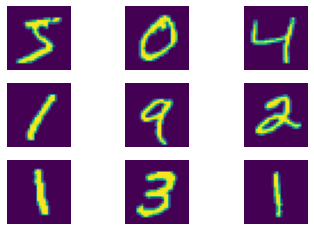

In [ ]:
plt.figure
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train_raw[i])
  plt.axis('off')

plt.show()

In [ ]:
# plt.imshow(x_train_raw[0])

### Reshape Gambar

In [ ]:
x_train = x_train_raw.reshape(60000,784)
x_test = x_test_raw.reshape(10000,784)

#### Normalisasi

In [ ]:
#
x_train = x_train.astype('float64')/255
# x_test = x_test.astype('float64')/255

#### Buat Model

In [ ]:
model_mnist = keras.Sequential()

In [ ]:
# Input Layer
model_mnist.add(layers.Dense(512,activation='relu',input_dim=784))

# Hidden Layer
model_mnist.add(layers.Dense(256,activation='relu'))
model_mnist.add(layers.Dense(128,activation='relu'))

#Output Layer
model_mnist.add(layers.Dense(10,activation='softmax'))

**Activation**
- Regresi = relu, tanh
- Klasifikasi - Binary = sigmoid
- Klasifikasi - MultiClass = softmax

In [ ]:
model_mnist.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 512)               401920    
                                                                 
 dense_36 (Dense)            (None, 256)               131328    
                                                                 
 dense_37 (Dense)            (None, 128)               32896     
                                                                 
 dense_38 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________


### Compile Model

In [ ]:
Optimizer = optimizers.Adam(learning_rate=0.0001)
model_mnist.compile(loss=keras.losses.categorical_crossentropy,optimizer=Optimizer,
                    metrics=['accuracy'])

**Losses**
- Regresi = mse, mae
- Klasifikasi - Binary = binary_crossentropy
- Klasifikasi - MultiClass = categorical_crossentropy

**Metrics**
- Accuracy
- Recall
- Precision

#### Training Model

In [ ]:
model_mnist.fit(x_train,y_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 7s 14ms/step - loss: 2.3019 - accuracy: 0.1124
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 5/10
469/469 [==============================] - 6s 14ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 6/10
469/469 [==============================] - 6s 14ms/step - loss: 2.3012 - accuracy: 0.1124
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 2.3011 - accuracy: 0.1124
Epoch 8/10
469/469 [==============================] - 7s 14ms/step - loss: 2.3011 - accuracy: 0.1124
Epoch 9/10
469/469 [==============================] - 7s 14ms/step - loss: 2.3010 - accuracy: 0.1124
Epoch 10/10
469/469 [==============================] - 7s 14ms/step - loss: 2.3009 - accura

#### Evaluate Model

In [ ]:
score = model_mnist.evaluate(x_test,y_test, verbose=1)
print(f'Test Loss : {score[0]}')
print(f'Test Akurasi : {round(score[1] * 100,2)}%')

ValueError: ignored

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

RuntimeError: ignored